In [92]:
import numpy as np
import matplotlib.pyplot as plt
import math

### variables

In [93]:
delta = 0.01
n = 1000
prob = np.arange(0, 1.05, 0.05)

In [94]:
np.random.seed(seed=42)

### Helper functions

In [95]:
def count(t):
    return np.sum(t == 1)

def getEmpFreq(inp):
    #Count of tails per 20 throw
    x = np.apply_along_axis(count, 1, inp)
    
    #Get the freqency
    map_ = lambda t: t / n 
    return map_(x)

### functions

In [96]:
def hoeffding():
    epsilon = math.sqrt(math.log(1/delta)/(2*n))
    print("Epsilon: ", epsilons)
    probabilities = []
    for p in prob:
        # Create a 1000x1 matrix with 0 and 1 with probability p and 1-p
        data = np.random.choice((0,1), size=(n, 1), p=(1-p, p))
        # Get the value of which the empirical frequency converges and add epsilon
        x = round(max(getEmpFreq(data).cumsum()) + epsilon, 4)
        probabilities.append(x)
    return probabilities

### plots

Epsilon:  0.04798525912188081
[0.048, 0.107, 0.149, 0.178, 0.243, 0.294, 0.347, 0.367, 0.417, 0.475, 0.559, 0.587, 0.643, 0.676, 0.765, 0.783, 0.864, 0.906, 0.961, 1.002, 1.048] 21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] 21


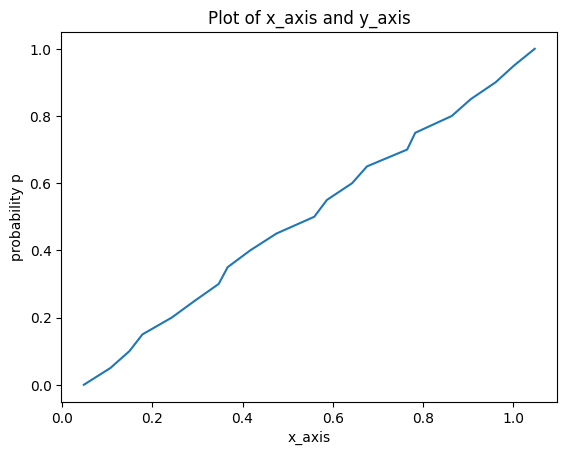

In [97]:
x_axis = hoeffding()
y_axis = prob
print(x_axis, len(x_axis))
print(y_axis, len(y_axis))

plt.plot(x_axis, y_axis)
plt.xlabel('x_axis')
plt.ylabel('probability p')
plt.title('Plot of x_axis and y_axis')
plt.show()
